# ENDG 310 — NumPy & Pandas Notebook
_A hands‑on companion to the lecture on files, NumPy, Pandas, and a touch of Matplotlib._

Generated: 2025-09-17 18:09

## Environment setup
This cell installs/imports the libraries used throughout the notebook. If you're in VSCode, run cells with `Shift+Enter` or the ▶️ button.

In [1]:
# If you're on a fresh environment, uncomment the next lines to install packages.
# %pip install numpy pandas matplotlib

import sys, platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('Python:', sys.version.split()[0])
print('Platform:', platform.platform())
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)


Python: 3.13.7
Platform: Windows-11-10.0.26100-SP0
NumPy: 2.3.3
Pandas: 2.3.2


## NumPy — efficient fixed‑type arrays
Python lists are flexible but **dynamic** and slower for large numeric work. NumPy arrays are fixed‑type, contiguous buffers with fast vectorized operations (ufuncs).

### Creating arrays

In [2]:
# From Python lists (NumPy will infer dtype and upcast if needed)
a = np.array([1, 4, 2, 5, 3])
b = np.array([3.14, 4, 2, 3])                # upcast to float
c = np.array([1, 2, 3, 4], dtype='float32')  # explicit dtype
print(a, a.dtype)
print(b, b.dtype)
print(c, c.dtype)

# From scratch
z = np.zeros(10, dtype=int)
r = np.random.randint(0, 10, (3, 3))  # 3x3 with values in [0,10)
print('zeros:', z)
print('randint(3x3):\n', r)


[1 4 2 5 3] int64
[3.14 4.   2.   3.  ] float64
[1. 2. 3. 4.] float32
zeros: [0 0 0 0 0 0 0 0 0 0]
randint(3x3):
 [[5 2 4]
 [8 1 8]
 [1 3 9]]


### Array attributes, indexing, slicing, reshaping

In [3]:
x = np.arange(12)              # 0..11
print('x:', x)
print('shape:', x.shape, 'ndim:', x.ndim, 'dtype:', x.dtype)

# reshape into 3x4
X = x.reshape(3, 4)
print('X:\n', X)

# indexing & slicing
print('X[0, 0] =', X[0, 0])
print('X[:, 1] =', X[:, 1])       # column 1
print('X[1:3, 2:4] =\n', X[1:3, 2:4])


x: [ 0  1  2  3  4  5  6  7  8  9 10 11]
shape: (12,) ndim: 1 dtype: int64
X:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
X[0, 0] = 0
X[:, 1] = [1 5 9]
X[1:3, 2:4] =
 [[ 6  7]
 [10 11]]


### Vectorized operations (ufuncs) & broadcasting

In [4]:
u = np.linspace(0, 2*np.pi, 5)
print('u:', u)
print('sin(u):', np.sin(u))   # unary ufunc
print('u**2 + 3*u:', u**2 + 3*u)

# broadcasting: add a 1D vector to each row of a 2D array
M = np.arange(12).reshape(3, 4)
v = np.array([10, 0, -10, 5])
print('M:\n', M)
print('v:', v)
print('M + v =\n', M + v)    # v is broadcast across rows


u: [0.         1.57079633 3.14159265 4.71238898 6.28318531]
sin(u): [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]
u**2 + 3*u: [ 0.          7.17979008 19.29438236 36.34377684 58.32797353]
M:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
v: [ 10   0 -10   5]
M + v =
 [[10  1 -8  8]
 [14  5 -4 12]
 [18  9  0 16]]


### Sorting and aggregations

In [5]:
arr = np.random.random(10)
print('arr:', arr)
print('sorted via np.sort:', np.sort(arr))   # returns a sorted copy
print('min / max / sum:', arr.min(), arr.max(), arr.sum())


arr: [0.5760826  0.1348489  0.75195204 0.75262349 0.10698515 0.73312304
 0.52960005 0.95152139 0.79515452 0.36773838]
sorted via np.sort: [0.10698515 0.1348489  0.36773838 0.52960005 0.5760826  0.73312304
 0.75195204 0.75262349 0.79515452 0.95152139]
min / max / sum: 0.10698514672918025 0.9515213916665697 5.699629564773704


### Quick Matplotlib check (single plot)
When using VSCode notebooks, the plot will appear under the cell.

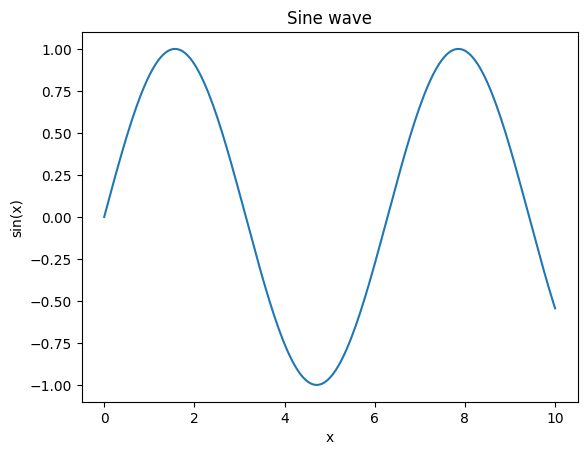

In [51]:
# NOTE: single plot; no custom styles or colors as per guidelines
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
plt.figure()
plt.plot(x, np.sin(x))
plt.title('Sine wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()


## Pandas — labeled 1D/2D data structures
- **Series**: 1D labeled array (values + explicit index)
- **DataFrame**: 2D table (columns are Series); behaves like a dict of columns and like a 2D array.

### Series basics

In [13]:
# Construct a Series with a custom index
s = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(s)
print('Value at b:', s['b'])
print('Slice explicit a..c (inclusive):\n', s['a':'c'])
print('Mask (values > 0.3 and < 0.9):\n', s[(s > 0.3) & (s < 0.9)])


a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
Value at b: 0.5
Slice explicit a..c (inclusive):
 a    0.25
b    0.50
c    0.75
dtype: float64
Mask (values > 0.3 and < 0.9):
 b    0.50
c    0.75
dtype: float64


### DataFrame construction

In [54]:
# From dicts / Series / arrays
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})
display(population["California":"Florida"])
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297,
                  'Florida': 170312, 'Illinois': 149995})
states = pd.DataFrame({'population': population, 'area': area})
display(states)
print('Index:', states.index.tolist())
print('Columns:', states.columns.tolist())
array2d = np.array([population.values,area.values]).transpose()

statesfromarray = pd.DataFrame(array2d,columns=["Population","Area"],index=["California","Texas","New York","Florida","Illinois"])
display(statesfromarray)

temp =pd.Series({2:'a', 1:'b', 3:'c'})
print(temp[1:3])
print(temp[0:2])
temp = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
print(temp)
temp = pd.Series(5, index=[100, 200, 300])
print(temp)


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Index: ['California', 'Texas', 'New York', 'Florida', 'Illinois']
Columns: ['population', 'area']


,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


1    b
3    c
dtype: object
2    a
1    b
dtype: object
3    c
2    a
dtype: object
100    5
200    5
300    5
dtype: int64


### Data selection: dictionary‑like and 2D‑array‑like
- Column selection behaves like a dictionary (`df['col']`).
- Row selection and slicing have **two indexers**:
  - `loc` → label‑based (explicit index)
  - `iloc` → position‑based (implicit integer index)

In [55]:
# Column selection (dict-like)
print(states['area'].head())

# Add a derived column (vectorized op + index alignment)
states['density'] = states['population'] / states['area']
display(states)

# loc: label-based; iloc: position-based
print('loc["California"]\n', states.loc['California'])
print('iloc[0]\n', states.iloc[0])

# loc slicing is inclusive on the stop label
display(states.loc['California':'Florida', ['population', 'density']])

# iloc slicing excludes the stop position
display(states.iloc[0:3, 0:2])
display(states.iloc[1])


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


loc["California"]
 population    3.833252e+07
area          4.239670e+05
density       9.041393e+01
Name: California, dtype: float64
iloc[0]
 population    3.833252e+07
area          4.239670e+05
density       9.041393e+01
Name: California, dtype: float64


,population,density
California,38332521,90.413926
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


population    2.644819e+07
area          6.956620e+05
density       3.801874e+01
Name: Texas, dtype: float64

### Alignment and arithmetic
Operations align on index/columns automatically. The result uses the union of labels.

In [45]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print('A:\n', A)
print('B:\n', B)
print('A + B (aligned on index):\n', A + B)


A:
 0    2
1    4
2    6
dtype: int64
B:
 1    1
2    3
3    5
dtype: int64
A + B (aligned on index):
 0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64


### Handling missing data (NaN)
Use `isnull()`, `dropna()`, and `fillna()`.
- `dropna(axis='rows' or 'columns')`, `thresh=` to keep rows/cols with at least `thresh` non‑NA values.
- `fillna` with constants or statistics (mean/median, etc.).

In [50]:
df = pd.DataFrame({
    'A': [1, np.nan, 3, None],
    'B': [4, 5, np.nan, 7],
    'C': ['x', 'y', None, 'z']
})
display(df)

print('isnull():\n', df.isnull())

# Drop columns with too many missing values
print('\nDrop columns with < 3 non-NA values:')
display(df.dropna(axis='columns', thresh=3))

# Fill numeric NaNs with column means (where applicable)
df_filled = df.copy()
for col in df_filled.select_dtypes(include='number'):
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
# Fill object NaNs with a placeholder
for col in df_filled.select_dtypes(exclude='number'):
    df_filled[col] = df_filled[col].fillna('missing')
display(df_filled)


,A,B,C
0,1.0,4.0,x
1,NaN,5.0,y
2,3.0,NaN,None
3,NaN,7.0,z


isnull():
        A      B      C
0  False  False  False
1   True  False  False
2  False   True   True
3   True  False  False

Drop columns with < 3 non-NA values:


,B,C
0,4.0,x
1,5.0,y
2,NaN,None
3,7.0,z


,A,B,C
0,1.0,4.000000,x
1,2.0,5.000000,y
2,3.0,5.333333,missing
3,2.0,7.000000,z


## Practice — short exercises
Try these without peeking at the hints.

1. **NumPy broadcasting:** Create a `(4, 3)` array of integers and add a length‑3 vector to every row.
2. **NumPy ufunc:** Generate 100 values from `0` to `2π` and compute `sin(x)**2 + cos(x)**2`.
3. **Pandas selection:** From the `states` DataFrame, return rows where `density > states['density'].median()` and only the `['population','density']` columns.
4. **Missing data:** From `df` above, drop rows with fewer than 2 non‑NA values, then fill the remaining NaNs in numeric columns with medians.

### (Optional) Hints

In [ ]:
# 1) Broadcast: arr + vec, where arr.shape == (4, 3) and vec.shape == (3,)
# 2) Use np.linspace and ufuncs
# 3) Use boolean masks with .loc, and list of columns
# 4) df.dropna(thresh=...), then df[col].fillna(df[col].median()) for numeric cols


## VSCode tips
- Run one cell at a time or all cells using the Run All command.
- Use Variable Explorer (in the Python extension) to inspect arrays and DataFrames.
- Restart the kernel if imports or variables get into a weird state.